# Set-Up

In [13]:
import numpy as np
import jax
import jax.numpy as jnp
from approx_post import ApproximateDistribution, JointDistribution, reverse_kl, forward_kl
import gaussian_1d_utils as utils

In [14]:
# First, let's define a model:
model = lambda theta: theta**2
model_grad = jax.vmap(jax.vmap(jax.jacfwd(model), in_axes=0), in_axes=0)

In [19]:
# Create artificial data:
np.random.seed(2)
ndim = 1
num_samples = 1
true_theta = np.array([2])
noise_std = np.identity(ndim)
data = utils.create_data(model, true_theta, noise_std, num_samples)

In [20]:
# Create Joint distribution from forward model:
prior_mean = 0*np.ones(ndim)
prior_std = np.identity(ndim)
joint = JointDistribution.from_model(model, noise_std, prior_mean, prior_std, model_grad)
# Create Gaussian approximate distribution:
approx = ApproximateDistribution.gaussian(ndim)

# 'Correct' Approximations

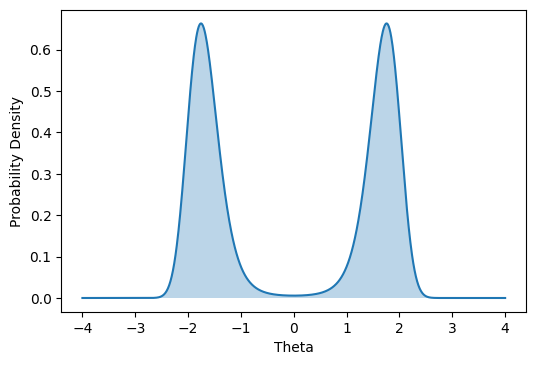

In [24]:
posterior = utils.create_posterior(model, data, noise_std, prior_mean, prior_std)
utils.plot_distributions(posterior, theta_lims=(-4,4))

In [14]:
mean_vals = np.linspace(-2.5, 2.5, 50) 
std_vals = np.linspace(0.1, 2.5, 50)

In [ ]:
forward_loss = utils.compute_loss(mean_vals, std_vals, approx, posterior=posterior, divergence='forward')
utils.save_json(forward_loss, 'forward_loss.json')

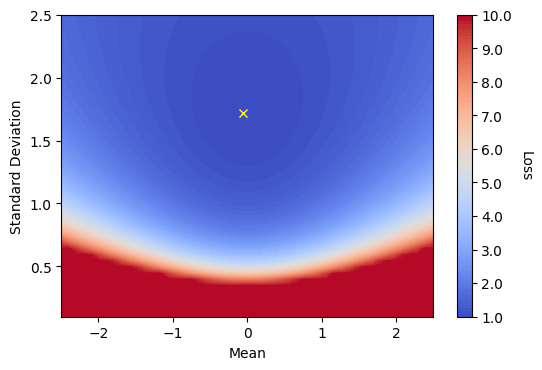

In [7]:
forward_loss = utils.load_json('forward_loss.json')
utils.plot_loss(forward_loss, loss_lims=(None,10))

Forward KL Approximation: Mean = -0.05102040816326525, Std = 1.7163265306122448


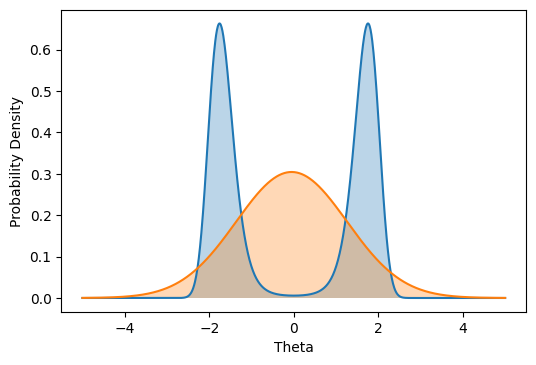

In [7]:
fwd_best_idx = np.argmin(forward_loss['loss'])
fwd_mean, fwd_std = forward_loss['mean'][fwd_best_idx], forward_loss['std'][fwd_best_idx]
print(f'Forward KL Approximation: Mean = {fwd_mean}, Std = {fwd_std}')
forward_approx = utils.create_gaussian(fwd_mean, fwd_std)
utils.plot_distributions(posterior, forward_approx)

In [15]:
reverse_loss = utils.compute_loss(mean_vals, std_vals, approx, posterior=posterior, divergence='reverse')
utils.save_json(reverse_loss, 'reverse_loss.json')

2500it [05:28,  7.61it/s]


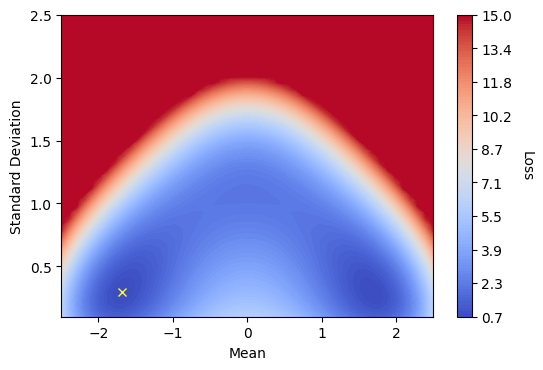

In [22]:
reverse_loss = utils.load_json('reverse_loss.json')
utils.plot_loss(reverse_loss, loss_lims=(None,15))

Reverse KL Approximation: Mean = -1.683673469387755, Std = 0.29591836734693877


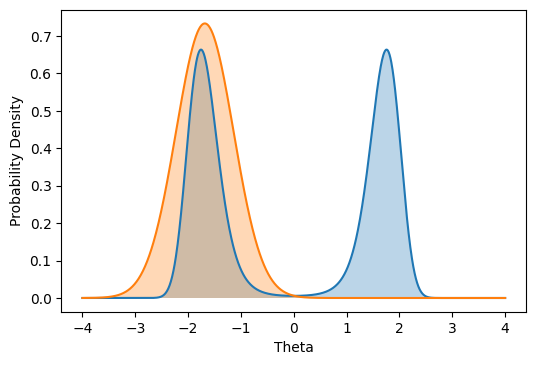

In [27]:
rev_best_idx = np.argmin(reverse_loss['loss'])
rev_mean, rev_std = reverse_loss['mean'][rev_best_idx], reverse_loss['std'][rev_best_idx]
print(f'Reverse KL Approximation: Mean = {rev_mean}, Std = {rev_std}')
reverse_approx = utils.create_gaussian(rev_mean, rev_std)
utils.plot_distributions(posterior, reverse_approx, theta_lims=(-4,4))

Laplace Approximation: Mean = 1.7559160162703755, Standard deviation = [0.07500207]


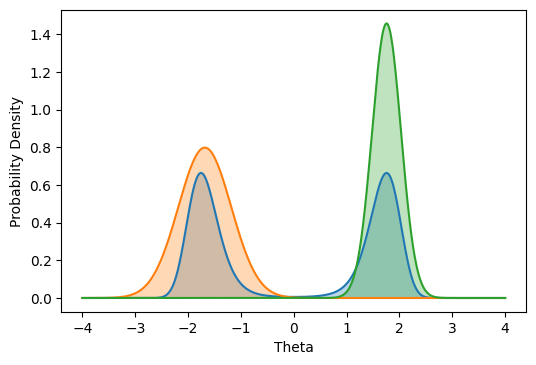

In [29]:
laplace_approx = utils.create_laplace_approx(model, data, noise_std, prior_mean, prior_std)
utils.plot_distributions(posterior, reverse_approx, laplace_approx, theta_lims=(-4,4))

# approx_post Approximations

In [21]:
loss = reverse_kl(approx, joint, use_reparameterisation=True)
approx.fit(loss, data, verbose=True, num_samples=100)

Iteration 1:
   Loss = 5.43035888671875, Params = {'mean': DeviceArray([0.2], dtype=float32), 'chol_diag': DeviceArray([1.1], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 2:
   Loss = 5.257821083068848, Params = {'mean': DeviceArray([0.30013546], dtype=float32), 'chol_diag': DeviceArray([1.1981305], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 3:
   Loss = 5.2395124435424805, Params = {'mean': DeviceArray([0.39841294], dtype=float32), 'chol_diag': DeviceArray([1.2888808], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 4:
   Loss = 5.424482345581055, Params = {'mean': DeviceArray([0.47969544], dtype=float32), 'chol_diag': DeviceArray([1.3578485], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 5:
   Loss = 5.750388145446777, Params = {'mean': DeviceArray([0.5133619], dtype=float32), 'chol_diag': DeviceArray([1.3888199], dtype=float32), 'chol_lowerdiag': DeviceArray([], 

Iteration 42:
   Loss = 5.310043811798096, Params = {'mean': DeviceArray([2.1860662], dtype=float32), 'chol_diag': DeviceArray([0.08847564], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 43:
   Loss = 6.164163589477539, Params = {'mean': DeviceArray([2.2122555], dtype=float32), 'chol_diag': DeviceArray([0.06525245], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 44:
   Loss = 6.6317596435546875, Params = {'mean': DeviceArray([2.208809], dtype=float32), 'chol_diag': DeviceArray([0.09012774], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 45:
   Loss = 6.328278541564941, Params = {'mean': DeviceArray([2.1800349], dtype=float32), 'chol_diag': DeviceArray([0.13632363], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 46:
   Loss = 5.803436756134033, Params = {'mean': DeviceArray([2.1325018], dtype=float32), 'chol_diag': DeviceArray([0.18973067], dtype=float32), 'chol_lowerdiag

Iteration 82:
   Loss = 4.416877269744873, Params = {'mean': DeviceArray([1.988791], dtype=float32), 'chol_diag': DeviceArray([0.24360229], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 83:
   Loss = 4.4571661949157715, Params = {'mean': DeviceArray([1.996559], dtype=float32), 'chol_diag': DeviceArray([0.23396555], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 84:
   Loss = 4.495734691619873, Params = {'mean': DeviceArray([2.002714], dtype=float32), 'chol_diag': DeviceArray([0.22682564], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 85:
   Loss = 4.52827262878418, Params = {'mean': DeviceArray([2.0069025], dtype=float32), 'chol_diag': DeviceArray([0.2227442], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 86:
   Loss = 4.550782203674316, Params = {'mean': DeviceArray([2.008908], dtype=float32), 'chol_diag': DeviceArray([0.221898], dtype=float32), 'chol_lowerdiag': Devi

Iteration 122:
   Loss = 4.445016860961914, Params = {'mean': DeviceArray([1.9873163], dtype=float32), 'chol_diag': DeviceArray([0.24692747], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 123:
   Loss = 4.449764728546143, Params = {'mean': DeviceArray([1.9878961], dtype=float32), 'chol_diag': DeviceArray([0.2459509], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 124:
   Loss = 4.452532768249512, Params = {'mean': DeviceArray([1.9880362], dtype=float32), 'chol_diag': DeviceArray([0.24544112], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 125:
   Loss = 4.453291416168213, Params = {'mean': DeviceArray([1.9877893], dtype=float32), 'chol_diag': DeviceArray([0.24542692], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 126:
   Loss = 4.4522385597229, Params = {'mean': DeviceArray([1.987237], dtype=float32), 'chol_diag': DeviceArray([0.24587244], dtype=float32), 'chol_lowerdia

Iteration 162:
   Loss = 4.4394025802612305, Params = {'mean': DeviceArray([1.984819], dtype=float32), 'chol_diag': DeviceArray([0.24877839], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 163:
   Loss = 4.438645362854004, Params = {'mean': DeviceArray([1.9846174], dtype=float32), 'chol_diag': DeviceArray([0.24892664], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 164:
   Loss = 4.437755107879639, Params = {'mean': DeviceArray([1.9844186], dtype=float32), 'chol_diag': DeviceArray([0.24910128], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 165:
   Loss = 4.4368720054626465, Params = {'mean': DeviceArray([1.984249], dtype=float32), 'chol_diag': DeviceArray([0.24927725], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 166:
   Loss = 4.436114311218262, Params = {'mean': DeviceArray([1.9841261], dtype=float32), 'chol_diag': DeviceArray([0.24943046], dtype=float32), 'chol_lowe

Iteration 202:
   Loss = 4.436500549316406, Params = {'mean': DeviceArray([1.9843494], dtype=float32), 'chol_diag': DeviceArray([0.24927062], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 203:
   Loss = 4.4365410804748535, Params = {'mean': DeviceArray([1.9843689], dtype=float32), 'chol_diag': DeviceArray([0.2492608], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 204:
   Loss = 4.436626434326172, Params = {'mean': DeviceArray([1.984394], dtype=float32), 'chol_diag': DeviceArray([0.2492438], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 205:
   Loss = 4.436736106872559, Params = {'mean': DeviceArray([1.9844196], dtype=float32), 'chol_diag': DeviceArray([0.24922253], dtype=float32), 'chol_lowerdiag': DeviceArray([], dtype=float32)}
Iteration 206:
   Loss = 4.436849117279053, Params = {'mean': DeviceArray([1.9844419], dtype=float32), 'chol_diag': DeviceArray([0.24920046], dtype=float32), 'chol_lowerd